In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy.io import arff

warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Proje kök dizinini Python path'e ekle
import sys
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Config dosyasını import et
from src.config import *

print("✅ Kütüphaneler başarıyla yüklendi!")
print(f"✅ Proje Dizini: {BASE_DIR}")


✅ Kütüphaneler başarıyla yüklendi!
✅ Proje Dizini: c:\Users\PC\Desktop\classification_project


In [10]:
print("="*80)
print("VERİ YÜKLEME")
print("="*80)

try:
    data_arff, meta = arff.loadarff(RAW_DATA_FILE)
    df = pd.DataFrame(data_arff)
    
    # Byte string'leri decode et (eğer varsa)
    for col in df.columns:
        if df[col].dtype == object:
            try:
                df[col] = df[col].str.decode('utf-8')
            except:
                pass
    
    df = df.astype(int)
    
    print(f"✅ ARFF dosyası başarıyla yüklendi: {RAW_DATA_FILE}")
    print(f"✅ Veri seti boyutu: {df.shape}")
    
except Exception as e:
    print(f"❌ Hata: {e}")
    print("⚠️  Alternatif yükleme metodu deneniyor...")


VERİ YÜKLEME
✅ ARFF dosyası başarıyla yüklendi: c:\Users\PC\Desktop\classification_project\data\raw\Training Dataset.arff
✅ Veri seti boyutu: (11055, 31)


In [11]:
print("\n" + "="*80)
print("VERİ SETİ GENEL BİLGİLERİ")
print("="*80)

print(f"""
📊 Temel İstatistikler:
   • Toplam Satır Sayısı: {df.shape[0]:,}
   • Toplam Sütun Sayısı: {df.shape[1]:,}
   • Öznitelik Sayısı: {len(FEATURE_NAMES)}
   • Hedef Değişken: {TARGET_NAME}
   • Toplam Hücre Sayısı: {df.shape[0] * df.shape[1]:,}
   • Bellek Kullanımı: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

📁 Veri Seti Bilgileri:
   • Kaynak: {RAW_DATA_FILE.name}
   • Format: ARFF (Attribute-Relation File Format)
   • Öznitelik Değerleri: {{-1, 0, 1}}
   • Sınıf Etiketleri: {{-1: Phishing, 1: Legitimate}}
""")


VERİ SETİ GENEL BİLGİLERİ

📊 Temel İstatistikler:
   • Toplam Satır Sayısı: 11,055
   • Toplam Sütun Sayısı: 31
   • Öznitelik Sayısı: 30
   • Hedef Değişken: Result
   • Toplam Hücre Sayısı: 342,705
   • Bellek Kullanımı: 2.61 MB

📁 Veri Seti Bilgileri:
   • Kaynak: Training Dataset.arff
   • Format: ARFF (Attribute-Relation File Format)
   • Öznitelik Değerleri: {-1, 0, 1}
   • Sınıf Etiketleri: {-1: Phishing, 1: Legitimate}



In [12]:
print("\n" + "="*80)
print("İLK 10 SATIR")
print("="*80)
print("\n")
display(df.head(10))

print("\n" + "="*80)
print("SON 10 SATIR")
print("="*80)
print("\n")
display(df.tail(10))

print("\n" + "="*80)
print("RASTGELE 10 ÖRNEK")
print("="*80)
print("\n")
display(df.sample(10, random_state=RANDOM_STATE))

print("\n" + "="*80)
print("VERİ TİPLERİ VE GENEL BİLGİ")
print("="*80)
print("\n")
df.info()

print("\n" + "="*80)
print("İSTATİSTİKSEL ÖZET")
print("="*80)
print("\n")
display(df.describe().T)


İLK 10 SATIR




,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1



SON 10 SATIR




,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11046,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,-1,1,1,1,1
11047,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1



RASTGELE 10 ÖRNEK




,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
10582,-1,-1,1,1,1,-1,-1,0,-1,1,...,1,1,1,1,0,-1,1,1,1,-1
7533,-1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,-1,1,1,-1,1,-1,1,-1
10806,-1,1,1,1,1,-1,1,-1,1,1,...,1,1,1,1,0,1,-1,1,1,-1
2992,1,-1,1,1,1,-1,0,1,-1,-1,...,-1,-1,-1,-1,1,1,-1,1,-1,1
8940,1,-1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,-1,-1,0,1,1
9054,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
304,1,-1,1,1,1,-1,0,1,1,1,...,1,1,-1,1,1,-1,1,0,1,1
9644,1,-1,1,1,1,-1,0,1,1,1,...,1,1,1,1,0,-1,1,0,1,-1
5034,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,1,1,-1,-1,0,1,-1
1470,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,-1,1,0,1,-1



VERİ TİPLERİ VE GENEL BİLGİ


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor  

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [13]:
print("\n" + "="*80)
print("HEDEF DEĞİŞKEN ANALİZİ")
print("="*80)

# Sınıf dağılımı
target_counts = df[TARGET_NAME].value_counts().sort_index()
target_percentages = df[TARGET_NAME].value_counts(normalize=True).sort_index() * 100

print("\n📊 Sınıf Dağılımı:")
print("-"*60)
for cls in sorted(df[TARGET_NAME].unique()):
    count = target_counts[cls]
    percentage = target_percentages[cls]
    label = CLASS_LABELS[cls]
    print(f"  {label:12} ({cls:2}): {count:6,} ({percentage:6.2f}%)")

# Denge durumu kontrolü
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\n⚖️  Dengesizlik Oranı: {imbalance_ratio:.2f}:1")

if imbalance_ratio < 1.5:
    balance_status = "✅ Veri seti dengeli"
elif imbalance_ratio < 3:
    balance_status = "⚠️  Veri setinde hafif dengesizlik var"
else:
    balance_status = "❌ Veri setinde ciddi dengesizlik var - resampling gerekebilir"

print(f"{balance_status}")


HEDEF DEĞİŞKEN ANALİZİ

📊 Sınıf Dağılımı:
------------------------------------------------------------
  Phishing     (-1):  4,898 ( 44.31%)
  Legitimate   ( 1):  6,157 ( 55.69%)

⚖️  Dengesizlik Oranı: 1.26:1
✅ Veri seti dengeli


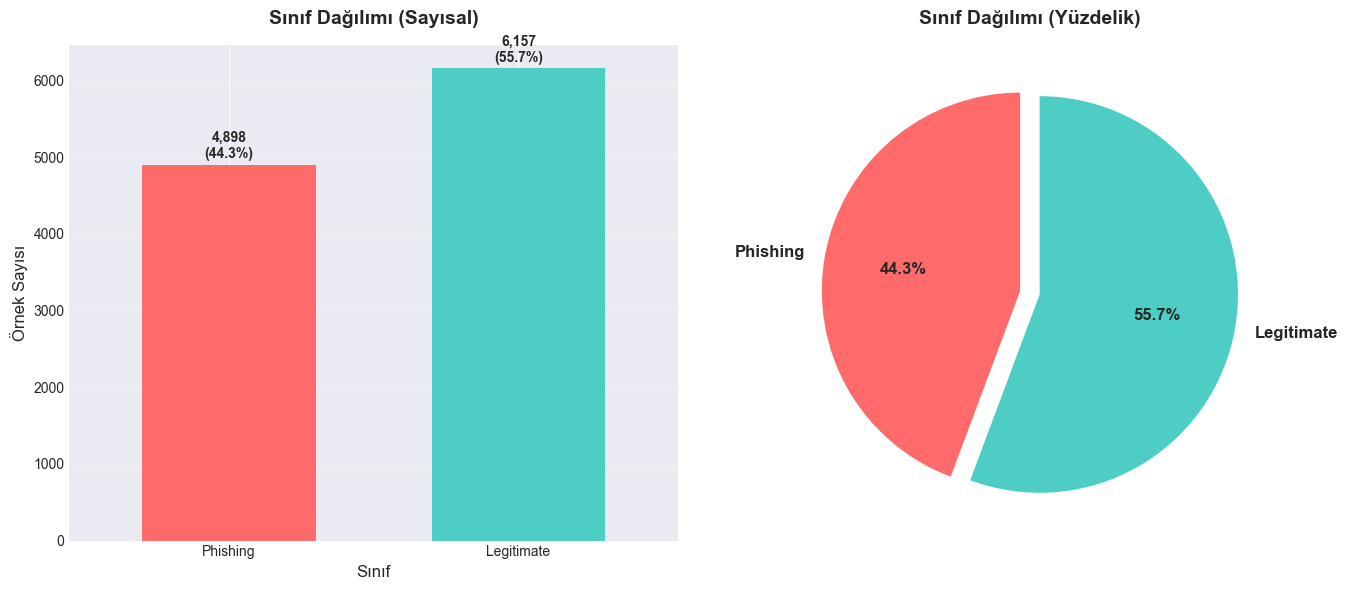


✅ Grafik kaydedildi: c:\Users\PC\Desktop\classification_project\reports\figures\class_distribution.png


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['#FF6B6B', '#4ECDC4']
target_counts.plot(kind='bar', ax=axes[0], color=colors, width=0.6)
axes[0].set_title('Sınıf Dağılımı (Sayısal)', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Sınıf', fontsize=12)
axes[0].set_ylabel('Örnek Sayısı', fontsize=12)
axes[0].set_xticklabels([CLASS_LABELS[cls] for cls in sorted(target_counts.index)], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

for i, (idx, value) in enumerate(target_counts.items()):
    axes[0].text(i, value + 50, f'{value:,}\n({target_percentages[idx]:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

explode = (0.05, 0.05)
axes[1].pie(target_counts, labels=[CLASS_LABELS[cls] for cls in sorted(target_counts.index)], 
            autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Sınıf Dağılımı (Yüzdelik)', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'class_distribution.png', dpi=DPI, bbox_inches='tight')
plt.show()

print(f"\n✅ Grafik kaydedildi: {FIGURES_DIR / 'class_distribution.png'}")

In [15]:
print("\n" + "="*80)
print("ÖZNİTELİK ANALİZİ")
print("="*80)

print(f"""
📋 Öznitelik Bilgileri:
   • Toplam Öznitelik Sayısı: {len(FEATURE_NAMES)}
   • Hedef Değişken: {TARGET_NAME}
   • Öznitelik Değerleri: {{-1, 0, 1}}
   
🔍 Öznitelik Kategorileri:
   • URL-tabanlı özellikler
   • Alan adı özellikleri
   • HTML/JavaScript özellikleri
   • Sayfa içeriği özellikleri
""")

print("\n" + "="*80)
print("BENZERSİZ DEĞER ANALİZİ")
print("="*80)
print(f"\n{'No':<4} {'Öznitelik':<35} {'Benzersiz Değer Sayısı':<25} {'Değerler'}")
print("-"*100)

for idx, col in enumerate(FEATURE_NAMES, 1):
    unique_vals = sorted(df[col].unique())
    unique_count = len(unique_vals)
    print(f"{idx:<4} {col:<35} {unique_count:<25} {unique_vals}")




ÖZNİTELİK ANALİZİ

📋 Öznitelik Bilgileri:
   • Toplam Öznitelik Sayısı: 30
   • Hedef Değişken: Result
   • Öznitelik Değerleri: {-1, 0, 1}

🔍 Öznitelik Kategorileri:
   • URL-tabanlı özellikler
   • Alan adı özellikleri
   • HTML/JavaScript özellikleri
   • Sayfa içeriği özellikleri


BENZERSİZ DEĞER ANALİZİ

No   Öznitelik                           Benzersiz Değer Sayısı    Değerler
----------------------------------------------------------------------------------------------------
1    having_IP_Address                   2                         [np.int64(-1), np.int64(1)]
2    URL_Length                          3                         [np.int64(-1), np.int64(0), np.int64(1)]
3    Shortining_Service                  2                         [np.int64(-1), np.int64(1)]
4    having_At_Symbol                    2                         [np.int64(-1), np.int64(1)]
5    double_slash_redirecting            2                         [np.int64(-1), np.int64(1)]
6    Prefix_Suffix    

In [16]:
print("\n" + "="*80)
print("EKSİK DEĞER ANALİZİ")
print("="*80)

missing_data = pd.DataFrame({
    'Sütun': df.columns,
    'Eksik Sayısı': df.isnull().sum(),
    'Eksik Yüzdesi': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Eksik Sayısı'] > 0].sort_values('Eksik Sayısı', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️  Eksik Değerler Tespit Edildi:\n")
    print(missing_data.to_string(index=False))
    
    # Görselleştirme
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Sütun'], missing_data['Eksik Yüzdesi'], color='#FF6B6B')
    plt.xlabel('Eksik Değer Yüzdesi (%)', fontsize=12)
    plt.title('Eksik Değer Dağılımı', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / 'missing_values.png', dpi=DPI, bbox_inches='tight')
    plt.show()
    print(f"\n✅ Grafik kaydedildi: {FIGURES_DIR / 'missing_values.png'}")
else:
    print("\n✅ Veri setinde eksik değer bulunmuyor!")
    print("   Tüm öznitelikler tam dolu.")



EKSİK DEĞER ANALİZİ

✅ Veri setinde eksik değer bulunmuyor!
   Tüm öznitelikler tam dolu.



ÖZNİTELİK DEĞER DAĞILIMLARI (İlk 10 Öznitelik)

📊 having_IP_Address:
------------------------------------------------------------
  Değer -1:  3,793 (34.31%) █████████████████
  Değer  1:  7,262 (65.69%) ████████████████████████████████

📊 URL_Length:
------------------------------------------------------------
  Değer -1:  8,960 (81.05%) ████████████████████████████████████████
  Değer  0:    135 ( 1.22%) 
  Değer  1:  1,960 (17.73%) ████████

📊 Shortining_Service:
------------------------------------------------------------
  Değer -1:  1,444 (13.06%) ██████
  Değer  1:  9,611 (86.94%) ███████████████████████████████████████████

📊 having_At_Symbol:
------------------------------------------------------------
  Değer -1:  1,655 (14.97%) ███████
  Değer  1:  9,400 (85.03%) ██████████████████████████████████████████

📊 double_slash_redirecting:
------------------------------------------------------------
  Değer -1:  1,429 (12.93%) ██████
  Değer  1:  9,626 (87.07%) ██████████████████

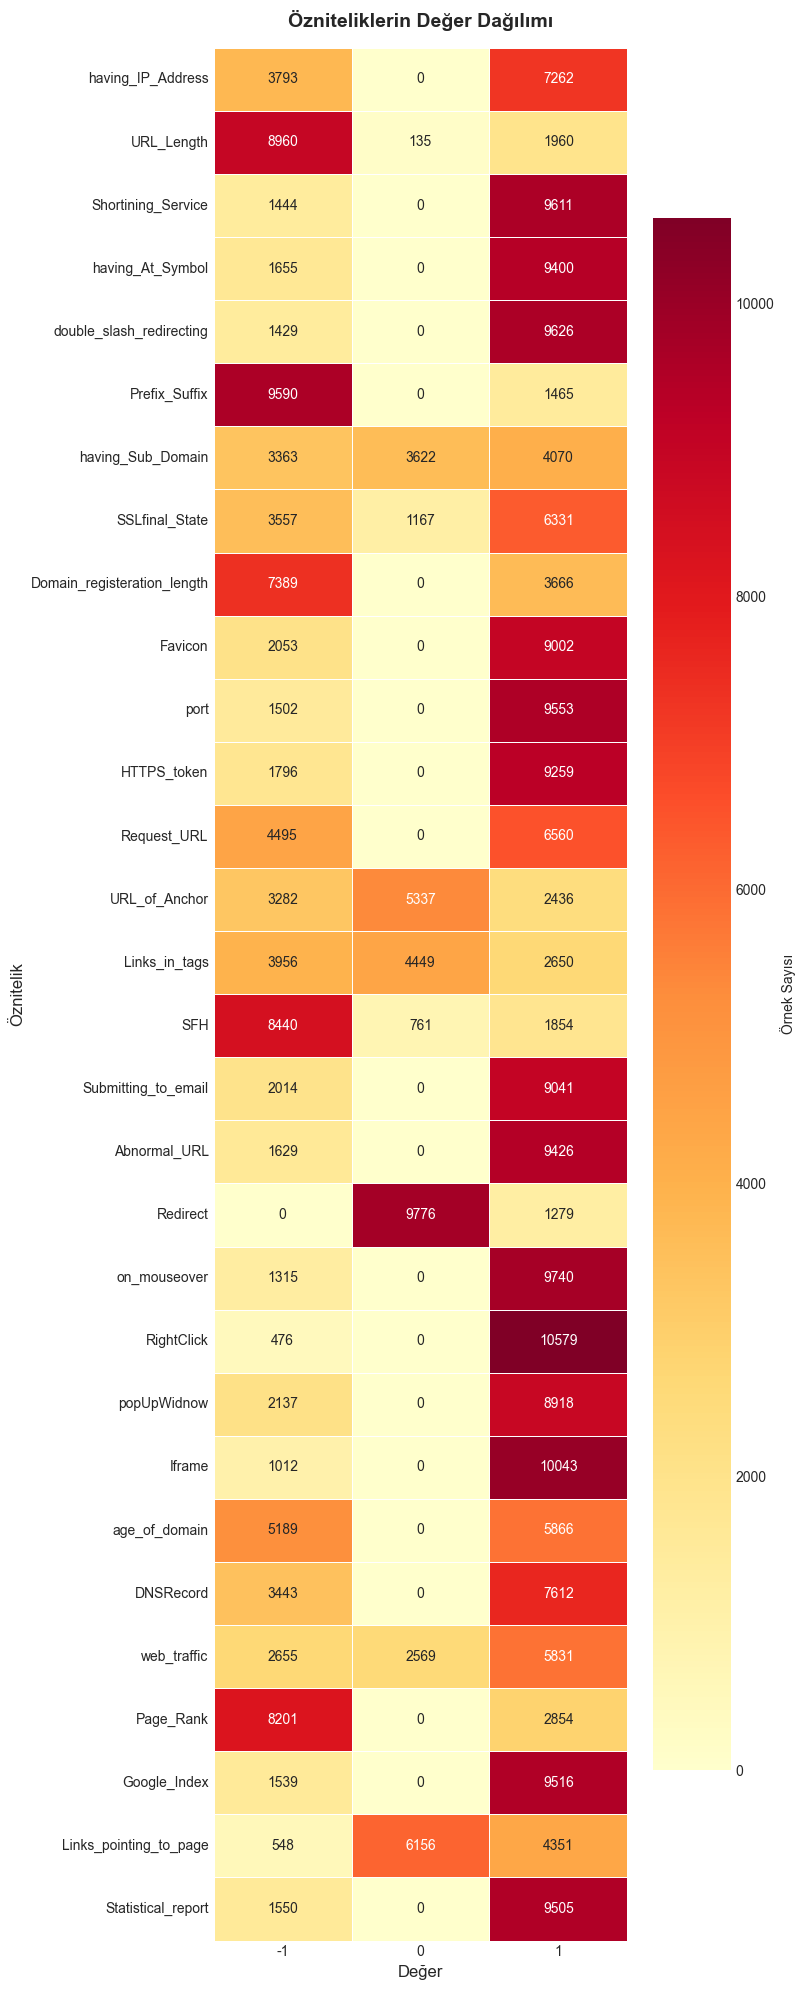


✅ Grafik kaydedildi: c:\Users\PC\Desktop\classification_project\reports\figures\feature_value_distributions.png


In [17]:
print("\n" + "="*80)
print("ÖZNİTELİK DEĞER DAĞILIMLARI (İlk 10 Öznitelik)")
print("="*80)

for col in FEATURE_NAMES[:10]:
    print(f"\n📊 {col}:")
    print("-"*60)
    value_counts = df[col].value_counts().sort_index()
    for val, count in value_counts.items():
        percentage = (count / len(df)) * 100
        bar = '█' * int(percentage / 2)
        print(f"  Değer {val:2}: {count:6,} ({percentage:5.2f}%) {bar}")

# %%
# Tüm özelliklerin dağılımı - Isı haritası
print("\n" + "="*80)
print("TÜM ÖZNİTELİKLERİN DEĞER DAĞILIMI - ISI HARİTASI")
print("="*80)

# Her öznitelik için değer dağılımını hesapla
distribution_data = []
for col in FEATURE_NAMES:
    value_counts = df[col].value_counts().sort_index()
    distribution_data.append([value_counts.get(-1, 0), value_counts.get(0, 0), value_counts.get(1, 0)])

dist_df = pd.DataFrame(distribution_data, index=FEATURE_NAMES, columns=['-1', '0', '1'])

# Isı haritası
plt.figure(figsize=(8, 20))
sns.heatmap(dist_df, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5, 
            cbar_kws={'label': 'Örnek Sayısı'})
plt.title('Özniteliklerin Değer Dağılımı', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Değer', fontsize=12)
plt.ylabel('Öznitelik', fontsize=12)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'feature_value_distributions.png', dpi=DPI, bbox_inches='tight')
plt.show()

print(f"\n✅ Grafik kaydedildi: {FIGURES_DIR / 'feature_value_distributions.png'}")



KORELASYON ANALİZİ

🔺 Hedef Değişken ile En Yüksek POZİTİF Korelasyonlar:
------------------------------------------------------------
   1. SSLfinal_State                       0.7147
   2. URL_of_Anchor                        0.6929
   3. Prefix_Suffix                        0.3486
   4. web_traffic                          0.3461
   5. having_Sub_Domain                    0.2983
   6. Request_URL                          0.2534
   7. Links_in_tags                        0.2482
   8. SFH                                  0.2214
   9. Google_Index                         0.1290
  10. age_of_domain                        0.1215

🔻 Hedef Değişken ile En Yüksek NEGATİF Korelasyonlar:
------------------------------------------------------------
   1. RightClick                           0.0127
   2. popUpWidnow                          0.0001
   3. Favicon                             -0.0003
   4. Iframe                              -0.0034
   5. Redirect                            -0.020

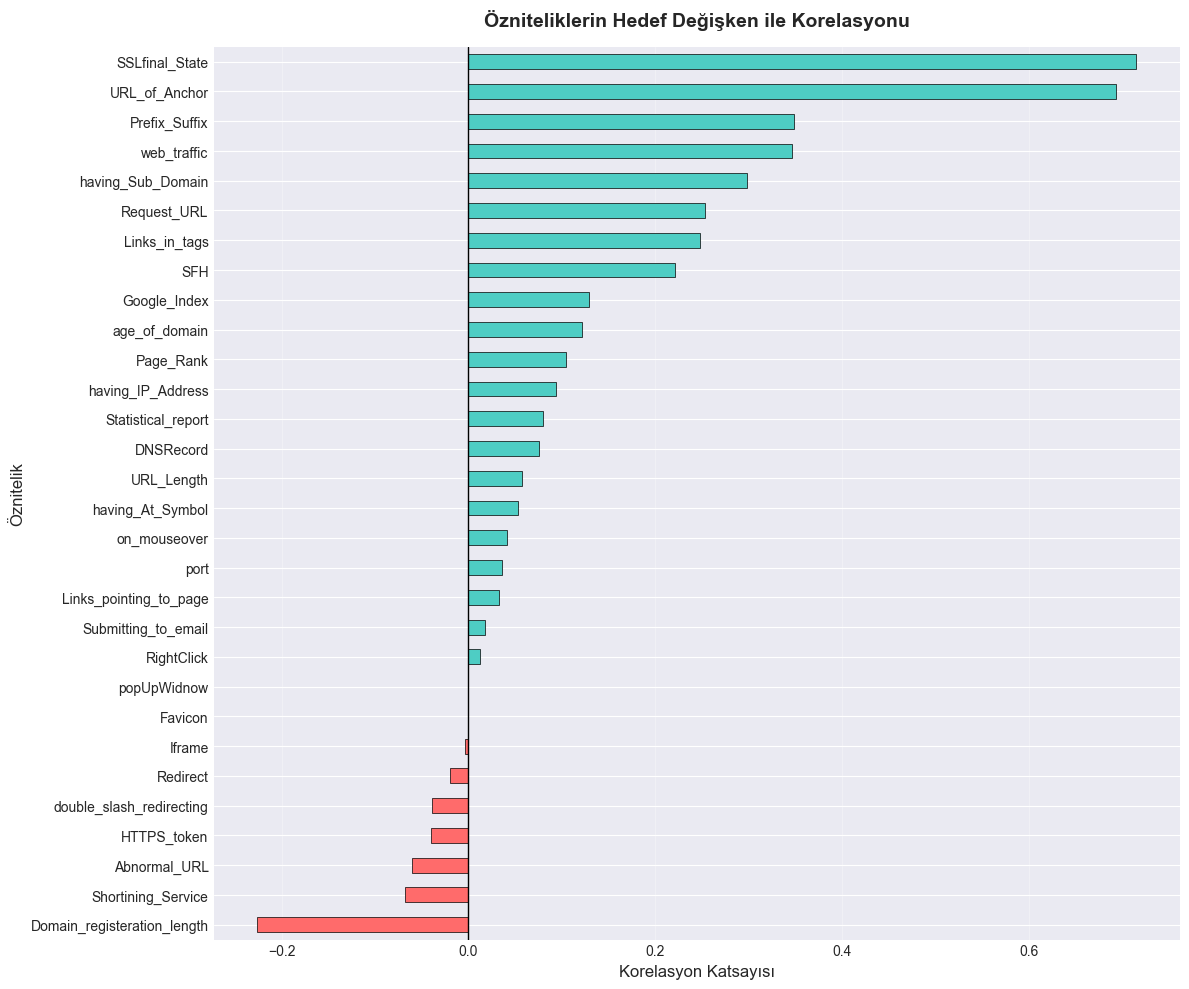


✅ Grafik kaydedildi: c:\Users\PC\Desktop\classification_project\reports\figures\target_correlation.png


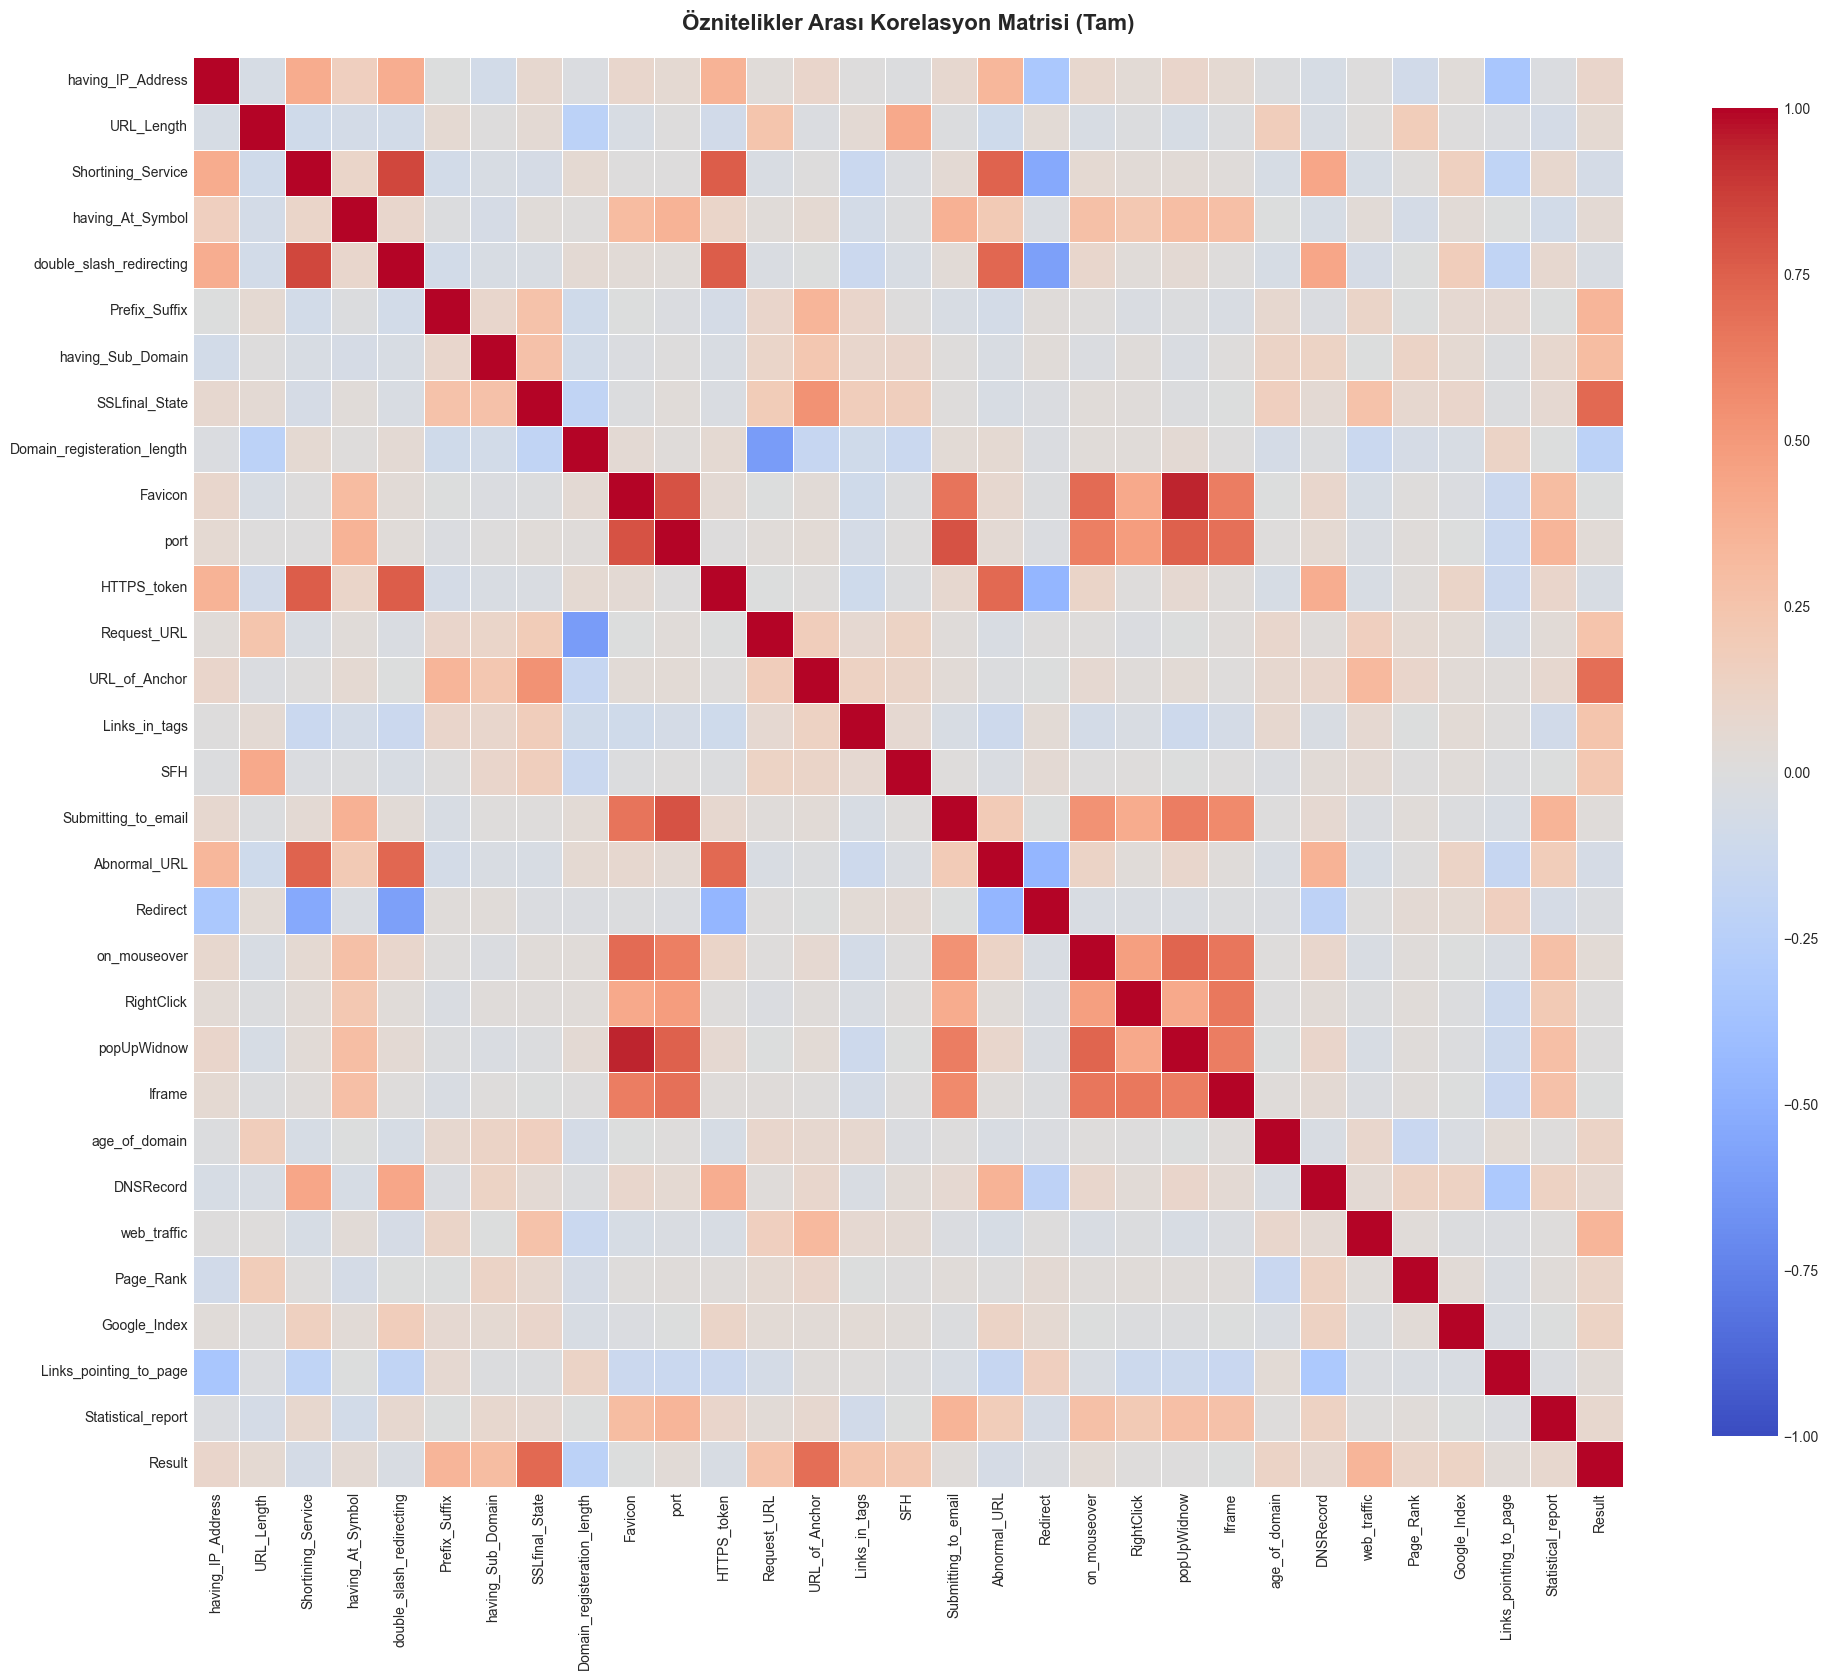


✅ Grafik kaydedildi: c:\Users\PC\Desktop\classification_project\reports\figures\correlation_matrix_full.png

ÖZNİTELİKLER ARASI EN YÜKSEK KORELASYONLAR

🔺 En Yüksek POZİTİF Korelasyonlar:
--------------------------------------------------------------------------------
             Öznitelik 1              Öznitelik 2  Korelasyon
                 Favicon              popUpWidnow    0.939633
      Shortining_Service double_slash_redirecting    0.842796
                 Favicon                     port    0.803834
                    port      Submitting_to_email    0.799088
double_slash_redirecting              HTTPS_token    0.760799
      Shortining_Service              HTTPS_token    0.757838
                    port              popUpWidnow    0.748517
      Shortining_Service             Abnormal_URL    0.739290
            on_mouseover              popUpWidnow    0.733629
double_slash_redirecting             Abnormal_URL    0.723724

🔻 En Yüksek NEGATİF Korelasyonlar:
------------

In [18]:
print("\n" + "="*80)
print("KORELASYON ANALİZİ")
print("="*80)

# Korelasyon matrisi
correlation_matrix = df.corr()

# Hedef değişkenle en yüksek korelasyona sahip öznitelikler
target_correlation = correlation_matrix[TARGET_NAME].drop(TARGET_NAME).sort_values(ascending=False)

print("\n🔺 Hedef Değişken ile En Yüksek POZİTİF Korelasyonlar:")
print("-"*60)
for idx, (feature, corr) in enumerate(target_correlation.head(10).items(), 1):
    print(f"  {idx:2}. {feature:<35} {corr:7.4f}")

print("\n🔻 Hedef Değişken ile En Yüksek NEGATİF Korelasyonlar:")
print("-"*60)
for idx, (feature, corr) in enumerate(target_correlation.tail(10).items(), 1):
    print(f"  {idx:2}. {feature:<35} {corr:7.4f}")

# %%
# Hedef değişkenle korelasyon bar plot
plt.figure(figsize=(12, 10))
target_corr_sorted = target_correlation.sort_values()
colors = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in target_corr_sorted]
target_corr_sorted.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5)
plt.xlabel('Korelasyon Katsayısı', fontsize=12)
plt.ylabel('Öznitelik', fontsize=12)
plt.title('Özniteliklerin Hedef Değişken ile Korelasyonu', fontsize=14, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'target_correlation.png', dpi=DPI, bbox_inches='tight')
plt.show()

print(f"\n✅ Grafik kaydedildi: {FIGURES_DIR / 'target_correlation.png'}")

# %%
# Tam korelasyon matrisi ısı haritası
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=False,
            square=True, vmin=-1, vmax=1)
plt.title('Öznitelikler Arası Korelasyon Matrisi (Tam)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'correlation_matrix_full.png', dpi=DPI, bbox_inches='tight')
plt.show()

print(f"\n✅ Grafik kaydedildi: {FIGURES_DIR / 'correlation_matrix_full.png'}")

# %%
# En yüksek korelasyonlu öznitelik çiftleri (hedef değişken hariç)
print("\n" + "="*80)
print("ÖZNİTELİKLER ARASI EN YÜKSEK KORELASYONLAR")
print("="*80)

# Üst üçgen matrisi al (kendisiyle korelasyonu hariç)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != TARGET_NAME and correlation_matrix.columns[j] != TARGET_NAME:
            corr_pairs.append({
                'Öznitelik 1': correlation_matrix.columns[i],
                'Öznitelik 2': correlation_matrix.columns[j],
                'Korelasyon': correlation_matrix.iloc[i, j]
            })

corr_pairs_df = pd.DataFrame(corr_pairs).sort_values('Korelasyon', key=abs, ascending=False)

print("\n🔺 En Yüksek POZİTİF Korelasyonlar:")
print("-"*80)
print(corr_pairs_df.head(10).to_string(index=False))

print("\n🔻 En Yüksek NEGATİF Korelasyonlar:")
print("-"*80)
print(corr_pairs_df.tail(10).to_string(index=False))



SINIF BAZLI ÖZNİTELİK ANALİZİ

📊 Sınıflar Arası En Büyük Farklılıklar:
--------------------------------------------------------------------------------


,Phishing Ort.,Legitimate Ort.,Fark
SSLfinal_State,-0.479788,0.832223,-1.312011
URL_of_Anchor,-0.632095,0.365438,-0.997532
web_traffic,-0.033891,0.542797,-0.576688
Request_URL,-0.092283,0.408803,-0.501086
having_Sub_Domain,-0.209473,0.281468,-0.490942
Prefix_Suffix,-1.000000,-0.524119,-0.475881
Domain_registeration_length,-0.098408,-0.526393,0.427985
Links_in_tags,-0.330747,0.050999,-0.381746
SFH,-0.784198,-0.445834,-0.338364
age_of_domain,-0.074724,0.169401,-0.244125


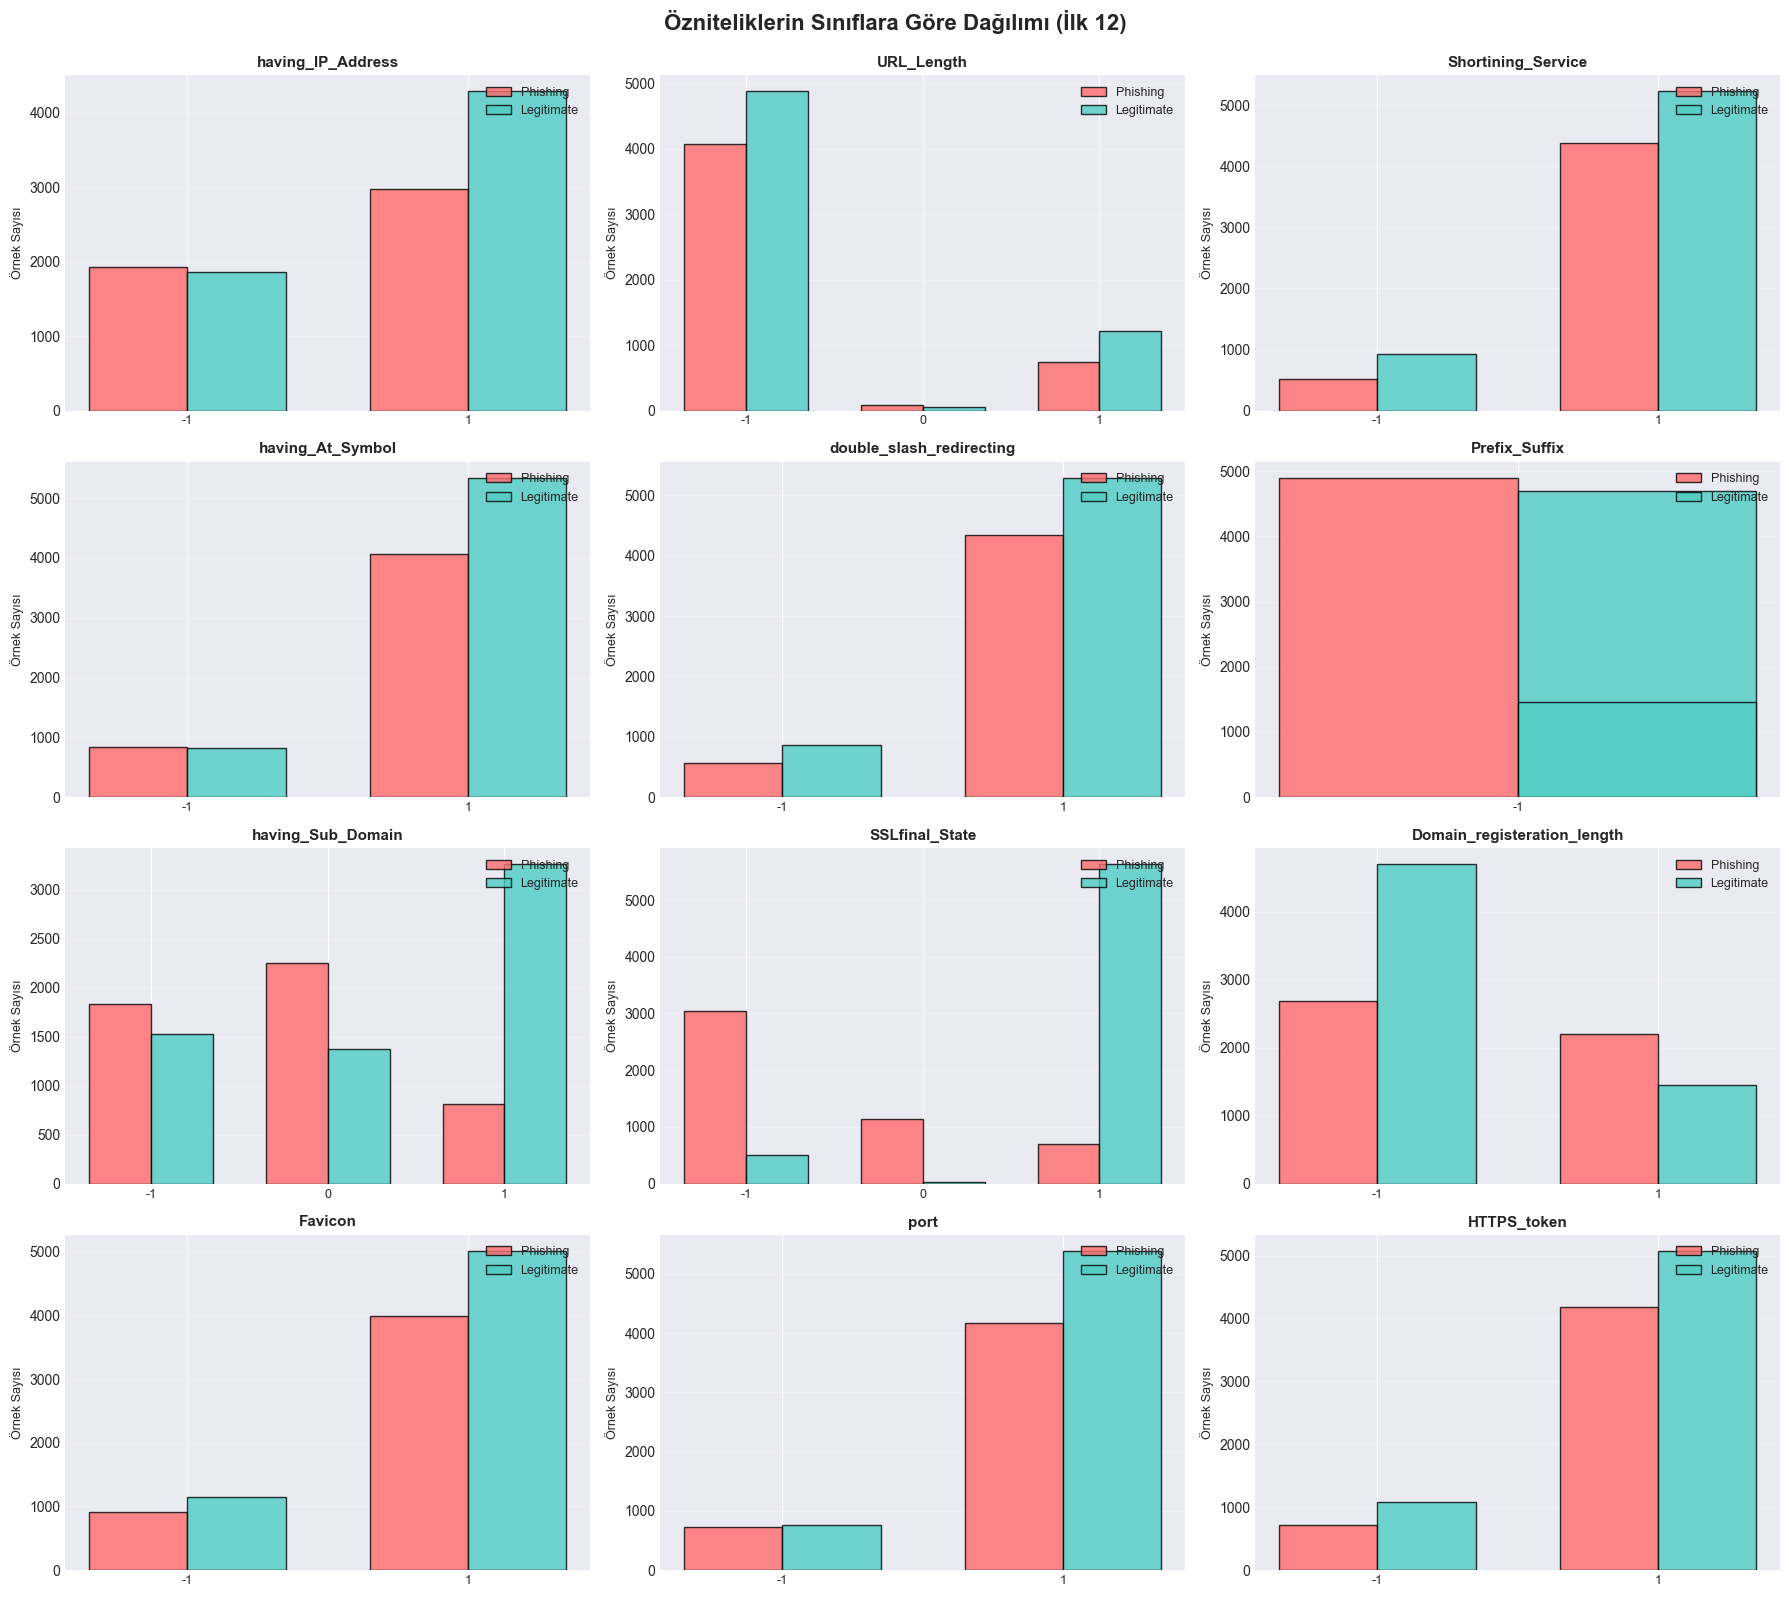


✅ Grafik kaydedildi: c:\Users\PC\Desktop\classification_project\reports\figures\feature_distributions_by_class.png


In [19]:
print("\n" + "="*80)
print("SINIF BAZLI ÖZNİTELİK ANALİZİ")
print("="*80)

# Her sınıf için öznitelik ortalamalarını hesapla
phishing_data = df[df[TARGET_NAME] == -1][FEATURE_NAMES]
legitimate_data = df[df[TARGET_NAME] == 1][FEATURE_NAMES]

class_means = pd.DataFrame({
    'Phishing Ort.': phishing_data.mean(),
    'Legitimate Ort.': legitimate_data.mean(),
    'Fark': phishing_data.mean() - legitimate_data.mean()
}).sort_values('Fark', key=abs, ascending=False)

print("\n📊 Sınıflar Arası En Büyük Farklılıklar:")
print("-"*80)
display(class_means.head(15))

# %%
# Özniteliklerin sınıflara göre dağılımı (ilk 12 öznitelik)
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(FEATURE_NAMES[:12]):
    phishing_counts = df[df[TARGET_NAME] == -1][col].value_counts().sort_index()
    legitimate_counts = df[df[TARGET_NAME] == 1][col].value_counts().sort_index()
    
    x = np.arange(len(phishing_counts))
    width = 0.35
    
    axes[idx].bar(x - width/2, phishing_counts.values, width, 
                 label='Phishing', color='#FF6B6B', alpha=0.8, edgecolor='black')
    axes[idx].bar(x + width/2, legitimate_counts.values, width, 
                 label='Legitimate', color='#4ECDC4', alpha=0.8, edgecolor='black')
    axes[idx].set_title(col, fontsize=11, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(phishing_counts.index, fontsize=9)
    axes[idx].legend(fontsize=9, loc='upper right')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylabel('Örnek Sayısı', fontsize=9)

plt.suptitle('Özniteliklerin Sınıflara Göre Dağılımı (İlk 12)', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'feature_distributions_by_class.png', dpi=DPI, bbox_inches='tight')
plt.show()

print(f"\n✅ Grafik kaydedildi: {FIGURES_DIR / 'feature_distributions_by_class.png'}")


In [21]:
print("\n" + "="*80)
print("VERİ KALİTESİ RAPORU")
print("="*80)

quality_report = pd.DataFrame([
    {
        'Öznitelik': col,
        'Veri Tipi': df[col].dtype,
        'Benzersiz Değer': df[col].nunique(),
        'Eksik Değer': df[col].isnull().sum(),
        'Eksik %': round(df[col].isnull().mean() * 100, 2),
        'Bellek (KB)': round(df[col].memory_usage(deep=True) / 1024, 2),
        'Min': df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else None,
        'Max': df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else None,
        'Ort.': round(df[col].mean(), 3) if pd.api.types.is_numeric_dtype(df[col]) else None
    }
    for col in df.columns
])

print("\n")
display(quality_report)

# Özet istatistikler
print("\n📊 Kalite Özeti:")
print("-"*60)
print(f"  • Toplam Veri Noktası: {df.shape[0] * df.shape[1]:,}")
print(f"  • Eksik Veri: {df.isnull().sum().sum():,} ({(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%)")
print(f"  • Tam Dolu Sütun: {len(df.columns[df.isnull().sum() == 0])}/{len(df.columns)}")
print(f"  • Veri Kalite Skoru: {((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100):.2f}%")



VERİ KALİTESİ RAPORU




,Öznitelik,Veri Tipi,Benzersiz Değer,Eksik Değer,Eksik %,Bellek (KB),Min,Max,Ort.
0,having_IP_Address,int64,2,0,0.0,86.5,-1,1,0.314
1,URL_Length,int64,3,0,0.0,86.5,-1,1,-0.633
2,Shortining_Service,int64,2,0,0.0,86.5,-1,1,0.739
3,having_At_Symbol,int64,2,0,0.0,86.5,-1,1,0.701
4,double_slash_redirecting,int64,2,0,0.0,86.5,-1,1,0.741
5,Prefix_Suffix,int64,2,0,0.0,86.5,-1,1,-0.735
6,having_Sub_Domain,int64,3,0,0.0,86.5,-1,1,0.064
7,SSLfinal_State,int64,3,0,0.0,86.5,-1,1,0.251
8,Domain_registeration_length,int64,2,0,0.0,86.5,-1,1,-0.337
9,Favicon,int64,2,0,0.0,86.5,-1,1,0.629



📊 Kalite Özeti:
------------------------------------------------------------
  • Toplam Veri Noktası: 342,705
  • Eksik Veri: 0 (0.00%)
  • Tam Dolu Sütun: 31/31
  • Veri Kalite Skoru: 100.00%


In [ ]:
print("\n" + "="*80)
print("DATA UNDERSTANDING - ÖZET VE BULGULAR")
print("="*80)

print(f"""
📊 VERİ SETİ ÖZETİ:
   • Toplam Örnek: {len(df):,}
   • Toplam Öznitelik: {len(FEATURE_NAMES)}
   • Hedef Değişken: {TARGET_NAME} (Binary: -1=Phishing, 1=Legitimate)
   • Veri Boyutu: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

🎯 SINIF DAĞILIMI:
   • Phishing: {target_counts.get(-1, 0):,} ({target_percentages.get(-1, 0):.2f}%)
   • Legitimate: {target_counts.get(1, 0):,} ({target_percentages.get(1, 0):.2f}%)
   • Dengesizlik Oranı: {imbalance_ratio:.2f}:1
   • Durum: {balance_status}

✅ VERİ KALİTESİ:
   • Eksik Değer: {'Yok ✓' if df.isnull().sum().sum() == 0 else f'{df.isnull().sum().sum():,}'}
   • Tüm öznitelikler kategorik (-1, 0, 1 değerleri)
   • Veri tipi: Integer
   • Veri Kalite Skoru: {((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100):.2f}%

🔍 ÖNEMLİ BULGULAR:

1. SINIF DENGESİ:
   {balance_status}

2. ÖZNİTELİK YAPISI:
   • Tüm öznitelikler {{-1, 0, 1}} değerlerini alıyor
   • {len([col for col in FEATURE_NAMES if df[col].nunique() == 2])} öznitelik binary (2 benzersiz değer)
   • {len([col for col in FEATURE_NAMES if df[col].nunique() == 3])} öznitelik ternary (3 benzersiz değer)

3. EN ETKİLİ ÖZNİTELİKLER (Hedef ile Korelasyon):
   Pozitif Korelasyon (Legitimate göstergesi):
{chr(10).join([f"      • {idx}: {val:.3f}" for idx, val in target_correlation.head(5).items()])}
   
   Negatif Korelasyon (Phishing göstergesi):
{chr(10).join([f"      • {idx}: {val:.3f}" for idx, val in target_correlation.tail(5).items()])}

4. ÖZNİTELİKLER ARASI İLİŞKİ:
   • En yüksek pozitif korelasyon: {corr_pairs_df.iloc[0]['Korelasyon']:.3f}
     ({corr_pairs_df.iloc[0]['Öznitelik 1']} - {corr_pairs_df.iloc[0]['Öznitelik 2']})
   • Multicollinearity riski: {'Düşük' if corr_pairs_df.iloc[0]['Korelasyon'] < 0.8 else 'Orta'}

5. VERİ KALİTESİ:
   • {'✅ Eksik değer yok - veri temiz' if df.isnull().sum().sum() == 0 else '⚠️ Eksik değer mevcut - veri hazırlama aşamasında ele alınacak'}
   • {'✅' if df.duplicated().sum() == 0 else '⚠️'} Tekrarlı satır: {df.duplicated().sum()}
   • Veri formatı tutarlı ve standart

📋 SONRAKİ ADIMLAR (Data Preparation):

1. ✅ Veri bölme (Train-Test Split)
2. ✅ Özellik ölçeklendirme (eğer gerekirse)
3. ✅ Sınıf dengesizliği için strateji belirleme{' (SMOTE, class_weight)' if imbalance_ratio > 2 else ''}
4. ✅ Özellik mühendisliği (eğer gerekirse)
5. ✅ Veri validasyonu

🎯 BUSINESS UNDERSTANDING'DEN HEDEFLER:
   • Hedef Accuracy: ≥ 95%
   • Hedef Precision: ≥ 93%
   • Hedef Recall: ≥ 93%
   • Hedef F1-Score: ≥ 93%

💡 ÖNERİLER:
   1. Veri seti kaliteli ve temiz durumda
   2. {balance_status.split('Veri seti')[1] if 'Veri seti' in balance_status else ''}
   3. Feature importance analizi sonrası özellik seçimi yapılabilir
   4. Cross-validation ile model stabilitesi test edilmeli
   5. Ensemble metodlar (Random Forest, XGBoost) öncelikli denenebilir

🔄 SONRAKI AŞAMA: 03_data_preparation.ipynb
   • Train-Test split yapılacak
   • Veri validasyonu gerçekleştirilecek
   • Model eğitimi için veri hazırlanacak
""")


DATA UNDERSTANDING - ÖZET VE BULGULAR

📊 VERİ SETİ ÖZETİ:
   • Toplam Örnek: 11,055
   • Toplam Öznitelik: 30
   • Hedef Değişken: Result (Binary: -1=Phishing, 1=Legitimate)
   • Veri Boyutu: 2.61 MB

🎯 SINIF DAĞILIMI:
   • Phishing: 4,898 (44.31%)
   • Legitimate: 6,157 (55.69%)
   • Dengesizlik Oranı: 1.26:1
   • Durum: ✅ Veri seti dengeli

✅ VERİ KALİTESİ:
   • Eksik Değer: Yok ✓
   • Tüm öznitelikler kategorik (-1, 0, 1 değerleri)
   • Veri tipi: Integer
   • Veri Kalite Skoru: 100.00%

🔍 ÖNEMLİ BULGULAR:

1. SINIF DENGESİ:
   ✅ Veri seti dengeli

2. ÖZNİTELİK YAPISI:
   • Tüm öznitelikler {-1, 0, 1} değerlerini alıyor
   • 22 öznitelik binary (2 benzersiz değer)
   • 8 öznitelik ternary (3 benzersiz değer)

3. EN ETKİLİ ÖZNİTELİKLER (Hedef ile Korelasyon):
   Pozitif Korelasyon (Legitimate göstergesi):
      • SSLfinal_State: 0.715
      • URL_of_Anchor: 0.693
      • Prefix_Suffix: 0.349
      • web_traffic: 0.346
      • having_Sub_Domain: 0.298

   Negatif Korelasyon (Phishing